New and existing properties Pirce Comparison in the UK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/NewAndOldProperties.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141783 entries, 0 to 141782
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date                              141783 non-null  object 
 1   Region_Name                       141783 non-null  object 
 2   Area_Code                         141783 non-null  object 
 3   New_Build_Average_Price           138906 non-null  float64
 4   New_Build_Index                   138906 non-null  float64
 5   New_Build_Monthly_Change          138510 non-null  float64
 6   New_Build_Annual_Change           134178 non-null  float64
 7   New_Build_Sales_Volume            136334 non-null  float64
 8   Existing_Property_Average_Price   139110 non-null  float64
 9   Existing_Property_Index           139110 non-null  float64
 10  Existing_Property_Monthly_Change  138714 non-null  float64
 11  Existing_Property_Annual_Change   134382 non-null  f

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [6]:
data["New_Build_Average_Price"] = pd.to_numeric(data["New_Build_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


new_build_price = (
    data.groupby("Year")["New_Build_Average_Price"]
         .mean()
         .reset_index(name="New_Build_AvgPrice_UK_Yearly")
)

print(new_build_price)

    Year  New_Build_AvgPrice_UK_Yearly
0   2005                 182343.250000
1   2006                 193937.916667
2   2007                 208994.583333
3   2008                 202258.000000
4   2009                 182146.333333
5   2010                 187364.000000
6   2011                 190186.083333
7   2012                 189397.083333
8   2013                 194941.666667
9   2014                 210652.000000
10  2015                 221356.250000
11  2016                 242055.250000
12  2017                 254419.583333
13  2018                 265498.166667
14  2019                 267676.833333
15  2020                 275387.916667
16  2021                 285083.500000
17  2022                 305963.416667
18  2023                 322026.500000
19  2024                 329905.750000
20  2025                 394526.666667


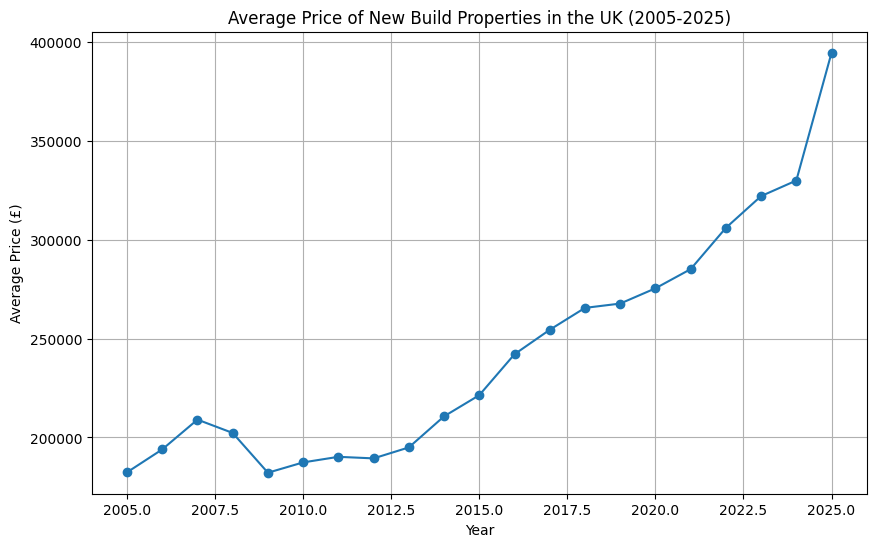

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show() 

In [8]:
data["New_Build_Annual_Change"] = pd.to_numeric(data["New_Build_Annual_Change"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


newbuild_yearly_change = (
    data.groupby("Year")["New_Build_Annual_Change"]
         .mean()
         .reset_index(name="New_Build_AvgChange_UK_Yearly")
)

print(newbuild_yearly_change)

    Year  New_Build_AvgChange_UK_Yearly
0   2005                            NaN
1   2006                       6.366667
2   2007                       7.775000
3   2008                      -3.066667
4   2009                      -9.600000
5   2010                       2.866667
6   2011                       1.525000
7   2012                      -0.400000
8   2013                       2.908333
9   2014                       8.058333
10  2015                       5.091667
11  2016                       9.358333
12  2017                       5.150000
13  2018                       4.366667
14  2019                       0.816667
15  2020                       2.908333
16  2021                       3.550000
17  2022                       7.325000
18  2023                       5.275000
19  2024                       2.441667
20  2025                      21.800000


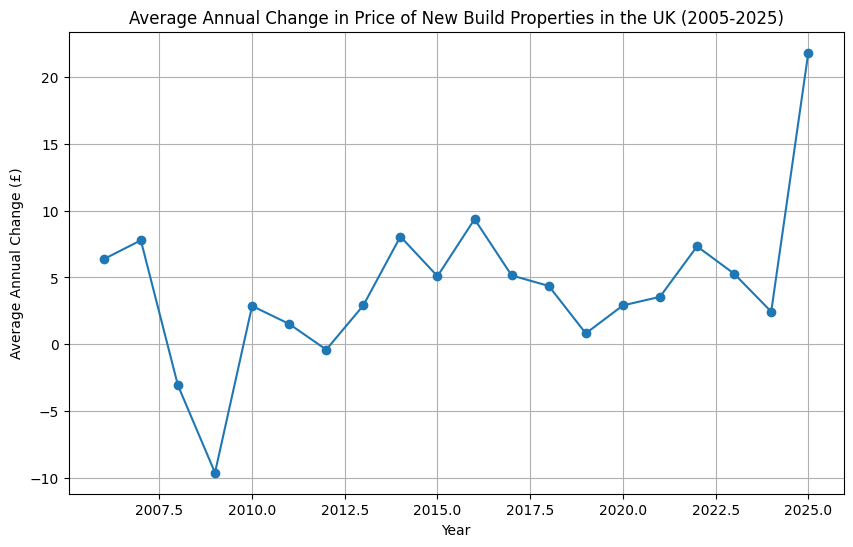

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o')
plt.title("Average Annual Change in Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Annual Change (£)")
plt.grid()
plt.show()

In [10]:
data["Existing_Property_Average_Price"] = pd.to_numeric(data["Existing_Property_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


existing_property_price = (
    data.groupby("Year")["Existing_Property_Average_Price"]
         .mean()
         .reset_index(name="Existing_Property_AvgPrice_UK_Yearly")
)

print(existing_property_price)


    Year  Existing_Property_AvgPrice_UK_Yearly
0   2005                         140852.416667
1   2006                         152134.166667
2   2007                         167548.916667
3   2008                         159860.583333
4   2009                         145826.500000
5   2010                         154714.416667
6   2011                         152016.333333
7   2012                         152698.416667
8   2013                         156566.000000
9   2014                         169126.583333
10  2015                         179282.500000
11  2016                         191494.916667
12  2017                         200137.750000
13  2018                         206382.083333
14  2019                         208461.750000
15  2020                         214619.583333
16  2021                         233594.166667
17  2022                         255830.833333
18  2023                         255845.250000
19  2024                         257693.750000
20  2025     

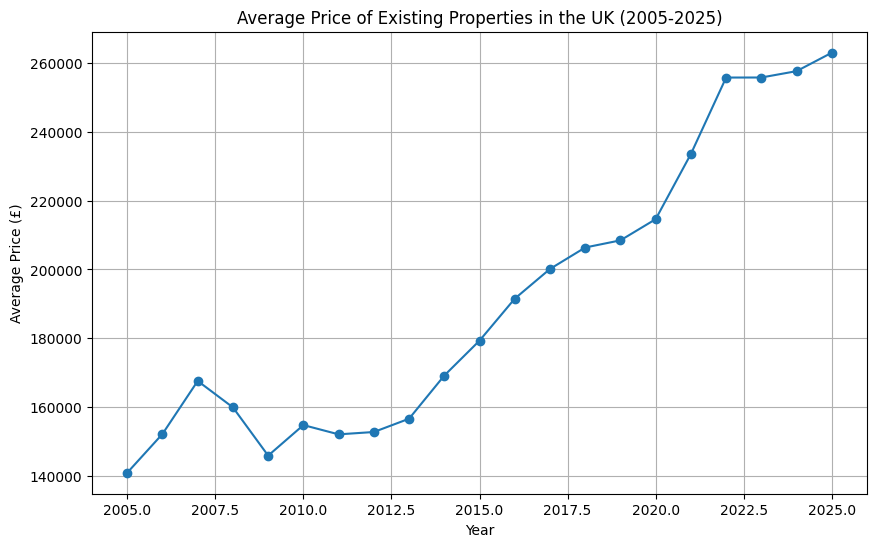

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(existing_property_price["Year"], existing_property_price["Existing_Property_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of Existing Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show() 

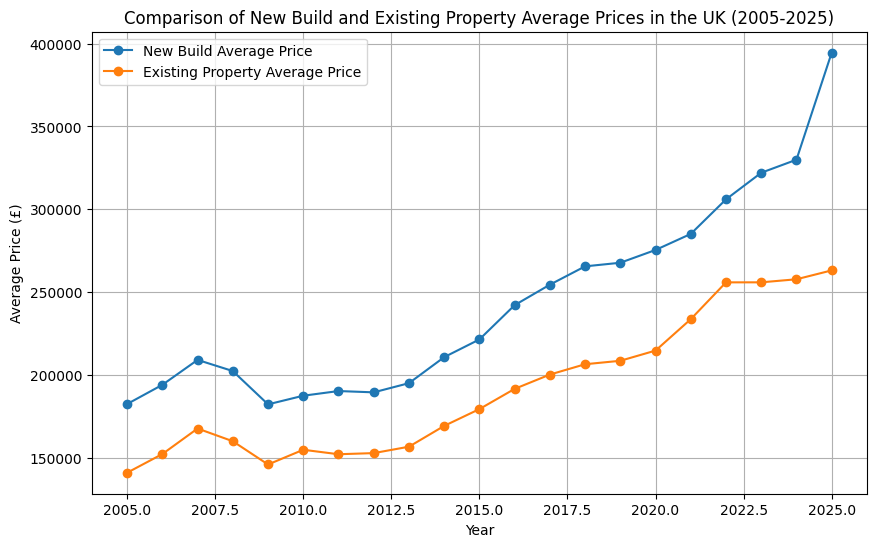

In [12]:
#Compare new build and existing property prices
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o', label='New Build Average Price')
plt.plot(existing_property_price["Year"], existing_property_price["Existing_Property_AvgPrice_UK_Yearly"], marker='o', label='Existing Property Average Price')
plt.title("Comparison of New Build and Existing Property Average Prices in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid()
plt.show()

In [13]:
data["Existing_Property_Annual_Change"] = pd.to_numeric(data["Existing_Property_Annual_Change"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


existing_property_yearly_change = (
    data.groupby("Year")["Existing_Property_Annual_Change"]
         .mean()
         .reset_index(name="Existing_Property_AvgChange_UK_Yearly")
)

print(existing_property_yearly_change)

    Year  Existing_Property_AvgChange_UK_Yearly
0   2005                                    NaN
1   2006                               7.991667
2   2007                              10.150000
3   2008                              -4.433333
4   2009                              -8.458333
5   2010                               6.183333
6   2011                              -1.733333
7   2012                               0.441667
8   2013                               2.533333
9   2014                               8.000000
10  2015                               6.016667
11  2016                               6.841667
12  2017                               4.500000
13  2018                               3.125000
14  2019                               1.000000
15  2020                               2.950000
16  2021                               8.850000
17  2022                               9.558333
18  2023                               0.066667
19  2024                               0

Text(0, 0.5, 'Average Annual Change (£)')

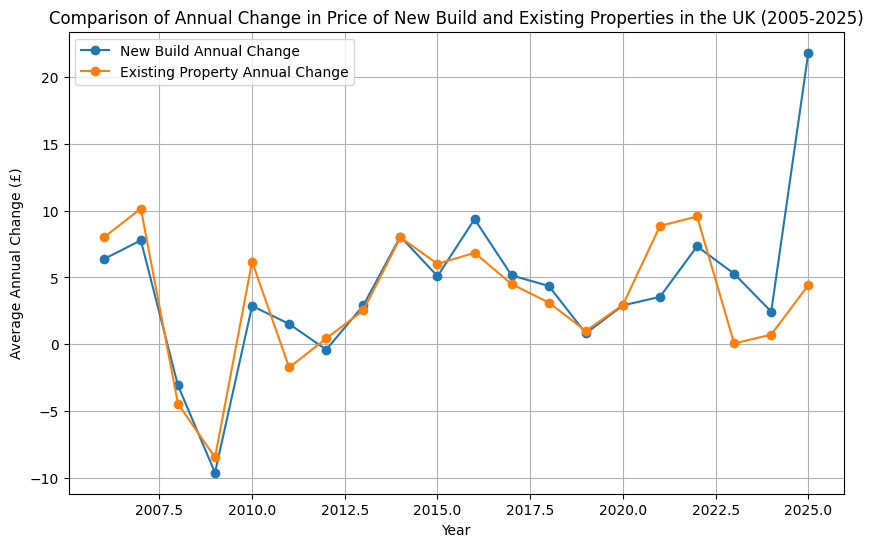

In [14]:
#plot new build vs existing property annual change
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o', label='New Build Annual Change')
plt.plot(existing_property_yearly_change["Year"], existing_property_yearly_change["Existing_Property_AvgChange_UK_Yearly"], marker='o', label='Existing Property Annual Change')
plt.title("Comparison of Annual Change in Price of New Build and Existing Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.ylabel("Average Annual Change (£)")

In [15]:
# UK inflation rate data
inflation_data = pd.read_csv('./Data/uk_inflation.csv')

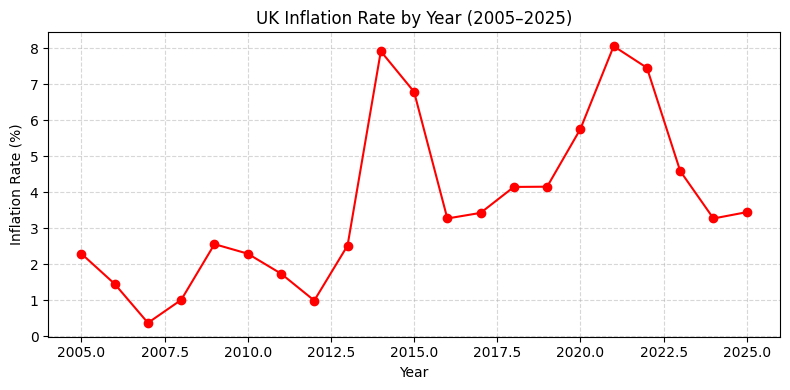

In [16]:
# inflation rate visualization
plt.figure(figsize=(8, 4))
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("UK Inflation Rate by Year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

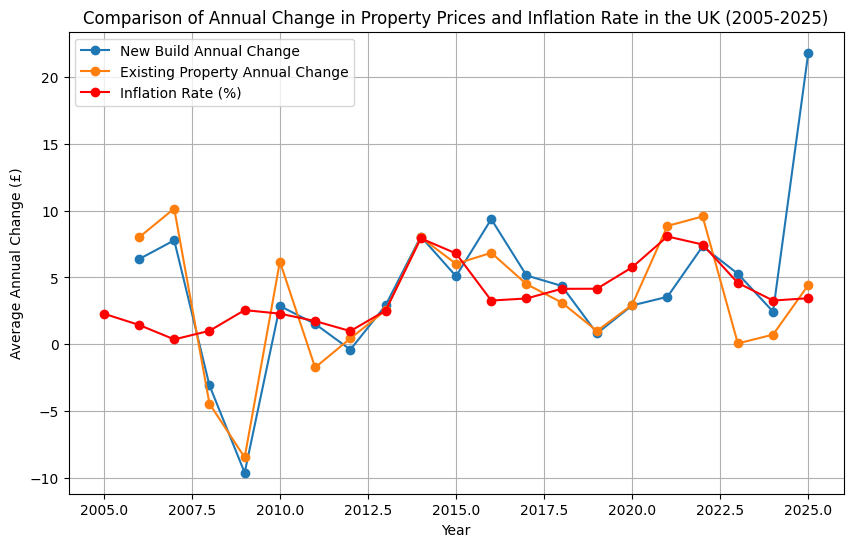

In [17]:
# compare inflation with property price changes
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o', label='New Build Annual Change')
plt.plot(existing_property_yearly_change["Year"], existing_property_yearly_change["Existing_Property_AvgChange_UK_Yearly"], marker='o', label='Existing Property Annual Change')
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", color="red", label='Inflation Rate (%)')
plt.title("Comparison of Annual Change in Property Prices and Inflation Rate in the UK (2005-2025)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.ylabel("Average Annual Change (£)")
plt.show()

In [18]:
#Combine all new data into a single DataFrame
combined_data = pd.merge(new_build_price, existing_property_price, on="Year")

In [19]:
combined_data.head()

,Year,New_Build_AvgPrice_UK_Yearly,Existing_Property_AvgPrice_UK_Yearly
0,2005,182343.250000,140852.416667
1,2006,193937.916667,152134.166667
2,2007,208994.583333,167548.916667
3,2008,202258.000000,159860.583333
4,2009,182146.333333,145826.500000


In [20]:
#combine all annual change data with inflation data
combined_annual_change = pd.merge(newbuild_yearly_change, existing_property_yearly_change, on="Year")
combined_annual_change = pd.merge(combined_annual_change, inflation_data, on="Year")
combined_annual_change.head()

,Year,New_Build_AvgChange_UK_Yearly,Existing_Property_AvgChange_UK_Yearly,Inflation_Consumer_Prices_Annual_Percent
0,2005,NaN,NaN,2.291667
1,2006,6.366667,7.991667,1.451120
2,2007,7.775000,10.150000,0.368047
3,2008,-3.066667,-4.433333,1.008417
4,2009,-9.600000,-8.458333,2.557756


In [21]:
cols = [
    'New_Build_AvgChange_UK_Yearly',
    'Existing_Property_AvgChange_UK_Yearly'
]

combined_annual_change[cols] = combined_annual_change[cols].bfill() 

In [22]:
yearly_gdp_growth = pd.read_csv('./Data/yearly_gdp_growth_rate.csv')

In [23]:
yearly_gdp_growth.head()

,Year,Growth Rate
0,2005,2.8
1,2006,2.7
2,2007,2.5
3,2008,0.3
4,2009,-4.3


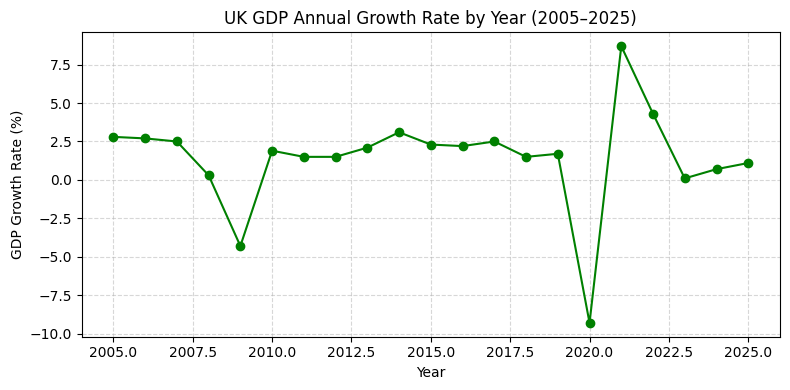

In [24]:
#plot GDP growth rate
plt.figure(figsize=(8, 4))
plt.plot(yearly_gdp_growth["Year"], yearly_gdp_growth["Growth Rate"], marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("UK GDP Annual Growth Rate by Year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [25]:
yearly_wage_growth = pd.read_csv('./Data/yearly_wage_growth_rate.csv')

In [26]:
yearly_wage_growth.head()

,Year,Regular Pay Growth (%)
0,2005,3.8
1,2006,3.7
2,2007,3.5
3,2008,3.6
4,2009,-2.9


Text(0.5, 1.0, 'UK Average Wage Growth Rate by Year (2005–2025)')

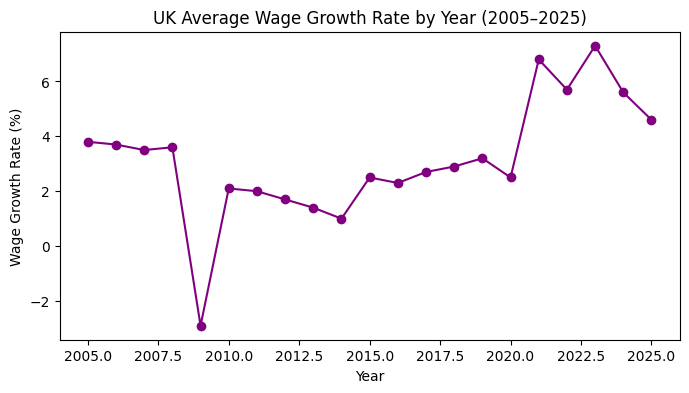

In [27]:
#plot wage growth rate
plt.figure(figsize=(8, 4))
plt.plot(yearly_wage_growth["Year"], yearly_wage_growth["Regular Pay Growth (%)"], marker="o", color="purple")
plt.xlabel("Year")
plt.ylabel("Wage Growth Rate (%)")
plt.title("UK Average Wage Growth Rate by Year (2005–2025)")

In [28]:
combined_annual_change.head()

,Year,New_Build_AvgChange_UK_Yearly,Existing_Property_AvgChange_UK_Yearly,Inflation_Consumer_Prices_Annual_Percent
0,2005,6.366667,7.991667,2.291667
1,2006,6.366667,7.991667,1.451120
2,2007,7.775000,10.150000,0.368047
3,2008,-3.066667,-4.433333,1.008417
4,2009,-9.600000,-8.458333,2.557756


In [29]:
#add yearly GDP growth and wage growth to combined annual change DataFrame
combined_annual_change = pd.merge(combined_annual_change, yearly_gdp_growth, on="Year")
combined_annual_change = pd.merge(combined_annual_change, yearly_wage_growth, on="Year")
combined_annual_change.head()

,Year,New_Build_AvgChange_UK_Yearly,Existing_Property_AvgChange_UK_Yearly,Inflation_Consumer_Prices_Annual_Percent,Growth Rate,Regular Pay Growth (%)
0,2005,6.366667,7.991667,2.291667,2.8,3.8
1,2006,6.366667,7.991667,1.451120,2.7,3.7
2,2007,7.775000,10.150000,0.368047,2.5,3.5
3,2008,-3.066667,-4.433333,1.008417,0.3,3.6
4,2009,-9.600000,-8.458333,2.557756,-4.3,-2.9


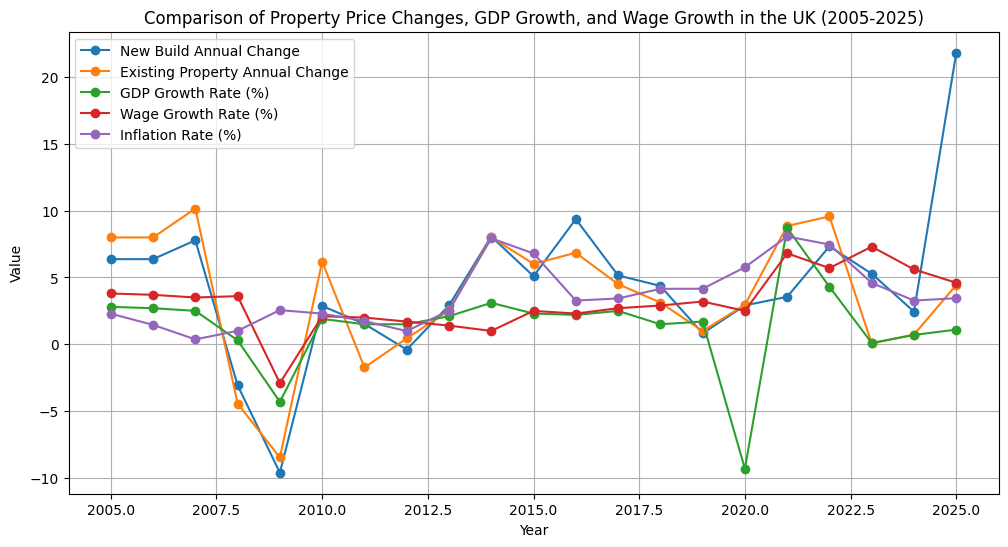

In [30]:

plt.figure(figsize=(12, 6))
plt.plot(combined_annual_change["Year"], combined_annual_change["New_Build_AvgChange_UK_Yearly"], marker='o', label='New Build Annual Change')
plt.plot(combined_annual_change["Year"], combined_annual_change["Existing_Property_AvgChange_UK_Yearly"], marker='o', label='Existing Property Annual Change')
plt.plot(combined_annual_change["Year"], combined_annual_change["Growth Rate"], marker='o', label='GDP Growth Rate (%)')
plt.plot(combined_annual_change["Year"], combined_annual_change["Regular Pay Growth (%)"], marker='o', label='Wage Growth Rate (%)')
plt.plot(combined_annual_change["Year"], combined_annual_change["Inflation_Consumer_Prices_Annual_Percent"], marker='o', label='Inflation Rate (%)')
plt.title("Comparison of Property Price Changes, GDP Growth, and Wage Growth in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

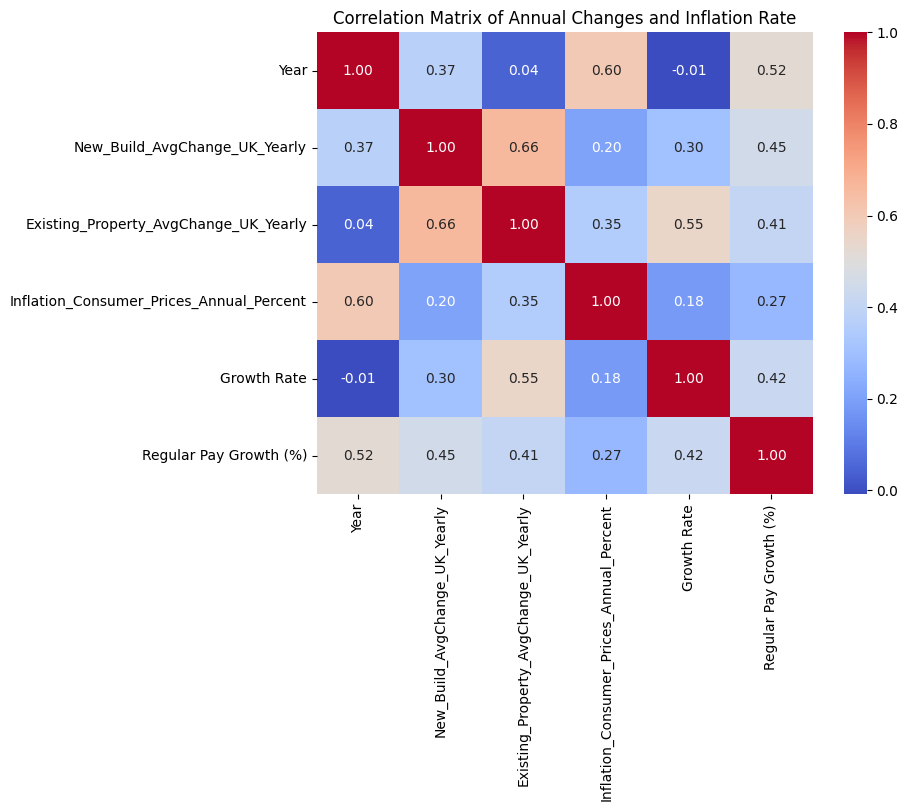

In [31]:
#corelation matrix plot
import seaborn as sns
corr = combined_annual_change.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Annual Changes and Inflation Rate")
plt.show()


In [33]:
#ARIMA model to forecast new build average prices
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(new_build_price["New_Build_AvgPrice_UK_Yearly"], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                                    SARIMAX Results                                     
Dep. Variable:     New_Build_AvgPrice_UK_Yearly   No. Observations:                   21
Model:                           ARIMA(1, 1, 1)   Log Likelihood                -221.682
Date:                          Fri, 23 Jan 2026   AIC                            449.363
Time:                                  13:04:06   BIC                            452.350
Sample:                                       0   HQIC                           449.946
                                           - 21                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    483.540      0.000       0.996       1.004
ma.L1         -0.9993      0.180     -5.537      0.

c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(new_build_price["New_Build_AvgPrice_UK_Yearly"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast 2026
forecast_2026 = model_fit.forecast(steps=1)

print(f"2026 New Build Average Price Forecast: £{forecast_2026.iloc[0]:,.2f}")

2026 New Build Average Price Forecast: £404,811.19


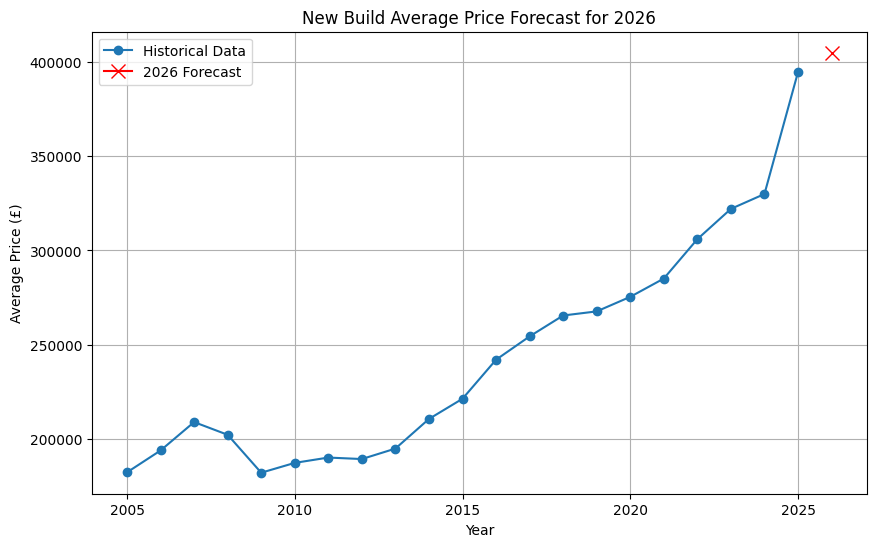

In [38]:
#plot forecasted value along with historical data
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o', label='Historical Data')
plt.plot(2026, forecast_2026.iloc[0], marker='x', color='red', markersize=10, label='2026 Forecast')
plt.title("New Build Average Price Forecast for 2026")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid()
plt.show()

In [39]:
# Compare with recent trend
last_price = new_build_price["New_Build_AvgPrice_UK_Yearly"].iloc[-1]
forecast_2026 = 404811.19

change = ((forecast_2026 - last_price) / last_price) * 100
print(f"Last year price: £{last_price:,.2f}")
print(f"2026 forecast: £{forecast_2026:,.2f}")
print(f"Implied change: {change:.2f}%")

# If change is >10% or <-10%, be suspicious

Last year price: £394,526.67
2026 forecast: £404,811.19
Implied change: 2.61%


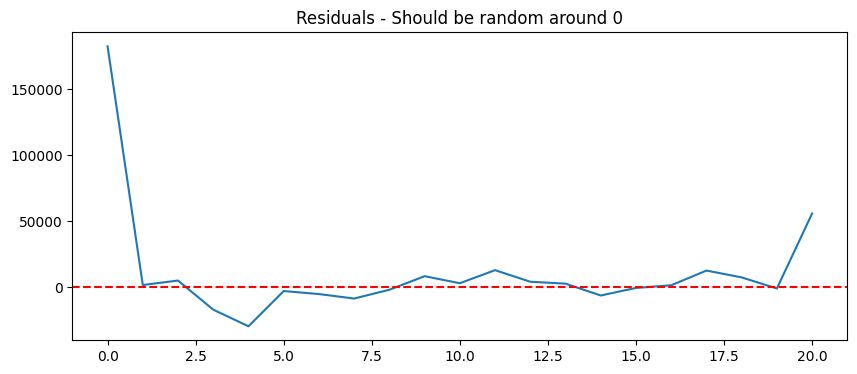

Shapiro test p-value: 0.0000
❌ Residuals NOT normal - model may be poor


In [40]:
import matplotlib.pyplot as plt

residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals - Should be random around 0')
plt.show()

# Check if residuals are normal
from scipy import stats
stat, p_value = stats.shapiro(residuals)
print(f"Shapiro test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("❌ Residuals NOT normal - model may be poor")
else:
    print("✓ Residuals are normal")

In [41]:
# Test how well ARIMA predicts known values
predictions = []
actuals = []

# Use last 5 years for testing
test_size = 5

for i in range(test_size):
    # Train on data up to year -i
    train_data = new_build_price["New_Build_AvgPrice_UK_Yearly"].iloc[:-test_size+i]
    
    # Fit model
    model_temp = ARIMA(train_data, order=(1, 1, 1))
    model_temp_fit = model_temp.fit()
    
    # Predict next year
    pred = model_temp_fit.forecast(steps=1).iloc[0]
    actual = new_build_price["New_Build_AvgPrice_UK_Yearly"].iloc[-test_size+i]
    
    predictions.append(pred)
    actuals.append(actual)
    print(f"Year {-test_size+i}: Predicted £{pred:,.0f}, Actual £{actual:,.0f}, Error: {abs(pred-actual):,.0f}")

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100

print(f"\nBacktest Results:")
print(f"MAE: £{mae:,.0f}")
print(f"RMSE: £{rmse:,.0f}")
print(f"MAPE: {mape:.2f}%")

Year -5: Predicted £276,315, Actual £285,084, Error: 8,769
Year -4: Predicted £286,296, Actual £305,963, Error: 19,668
Year -3: Predicted £308,438, Actual £322,026, Error: 13,588
Year -2: Predicted £324,593, Actual £329,906, Error: 5,312
Year -1: Predicted £331,647, Actual £394,527, Error: 62,880

Backtest Results:
MAE: £22,043
RMSE: £30,432
MAPE: 6.25%


In [47]:
from pmdarima import auto_arima
import numpy as np

# Find best model
auto_model = auto_arima(
    new_build_price["New_Build_AvgPrice_UK_Yearly"],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"\nBest model found: ARIMA{auto_model.order}")

# Forecast 2026 - NUMPY CONVERSION
forecast_result = auto_model.predict(n_periods=1, return_conf_int=True)
forecast_auto = float(forecast_result[0].values[0])  # Convert to numpy then float
conf_int = forecast_result[1]

print(f"\n2026 Auto-ARIMA Forecast: £{forecast_auto:,.2f}")
print(f"95% Confidence Interval: £{conf_int[0,0]:,.2f} - £{conf_int[0,1]:,.2f}")

# Compare
print(f"\nOriginal ARIMA(1,1,1): £404,811")
print(f"Auto-ARIMA(0,2,0): £{forecast_auto:,.2f}")
print(f"Difference: £{abs(forecast_auto - 404811):,.2f}")

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=426.547, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=428.446, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=430.207, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=425.193, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=431.279, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.094 seconds

Best model found: ARIMA(0, 2, 0)

2026 Auto-ARIMA Forecast: £459,147.58
95% Confidence Interval: £428,263.23 - £490,031.93

Original ARIMA(1,1,1): £404,811
Auto-ARIMA(0,2,0): £459,147.58
Difference: £54,336.58


In [48]:
import numpy as np

# Backtest Auto-ARIMA
predictions_auto = []
actuals_auto = []

for i in range(5):
    train = new_build_price["New_Build_AvgPrice_UK_Yearly"].iloc[:-5+i]
    
    model_auto = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
    pred = model_auto.predict(n_periods=1).values[0]
    actual = new_build_price["New_Build_AvgPrice_UK_Yearly"].iloc[-5+i]
    
    predictions_auto.append(pred)
    actuals_auto.append(actual)
    
    print(f"Year {i-5}: Predicted £{pred:,.0f}, Actual £{actual:,.0f}, Error: £{abs(pred-actual):,.0f}")

# Calculate MAPE
mape_auto = np.mean(np.abs((np.array(actuals_auto) - np.array(predictions_auto)) / np.array(actuals_auto))) * 100

print(f"\n{'='*60}")
print("BACKTEST COMPARISON")
print('='*60)
print(f"ARIMA(1,1,1) MAPE: 6.25%")
print(f"ARIMA(0,2,0) MAPE: {mape_auto:.2f}%")
print(f"\nBetter model: {'Auto-ARIMA' if mape_auto < 6.25 else 'Original ARIMA(1,1,1)'}")

Year -5: Predicted £281,591, Actual £285,084, Error: £3,493
Year -4: Predicted £291,505, Actual £305,963, Error: £14,459
Year -3: Predicted £313,235, Actual £322,026, Error: £8,791
Year -2: Predicted £329,787, Actual £329,906, Error: £119
Year -1: Predicted £337,672, Actual £394,527, Error: £56,854

BACKTEST COMPARISON
ARIMA(1,1,1) MAPE: 6.25%
ARIMA(0,2,0) MAPE: 4.63%

Better model: Auto-ARIMA


In [49]:
# Calculate year-over-year growth rates
data = new_build_price["New_Build_AvgPrice_UK_Yearly"]
years = new_build_price["Year"]

growth_rates = data.pct_change() * 100

# Show recent growth rates
print("Year-over-Year Growth Rates:")
for i in range(-5, 0):
    print(f"{years.iloc[i]}: {growth_rates.iloc[i]:.2f}%")

# Average growth (excluding 2025)
avg_growth_excluding_2025 = growth_rates.iloc[-6:-1].mean()
print(f"\nAverage growth (2020-2024): {avg_growth_excluding_2025:.2f}%")

# If 2025 continues trend
forecast_trend_continues = data.iloc[-1] * (1 + growth_rates.iloc[-1]/100)

# If 2025 reverts to average
forecast_trend_reverts = data.iloc[-1] * (1 + avg_growth_excluding_2025/100)

print(f"\nIf trend continues: £{forecast_trend_continues:,.2f}")
print(f"If reverts to average: £{forecast_trend_reverts:,.2f}")

Year-over-Year Growth Rates:
2021: 3.52%
2022: 7.32%
2023: 5.25%
2024: 2.45%
2025: 19.59%

Average growth (2020-2024): 4.28%

If trend continues: £471,805.33
If reverts to average: £411,430.05


14:52:08 - cmdstanpy - INFO - Chain [1] start processing
14:52:08 - cmdstanpy - INFO - Chain [1] done processing


Prophet 2026 Forecast: £361,557.64
95% CI: £343,003.85 - £379,696.09

Last 3 predictions:
           ds           yhat
19 2024-01-01  336636.713994
20 2025-01-01  349131.316643
21 2025-12-31  361557.642774


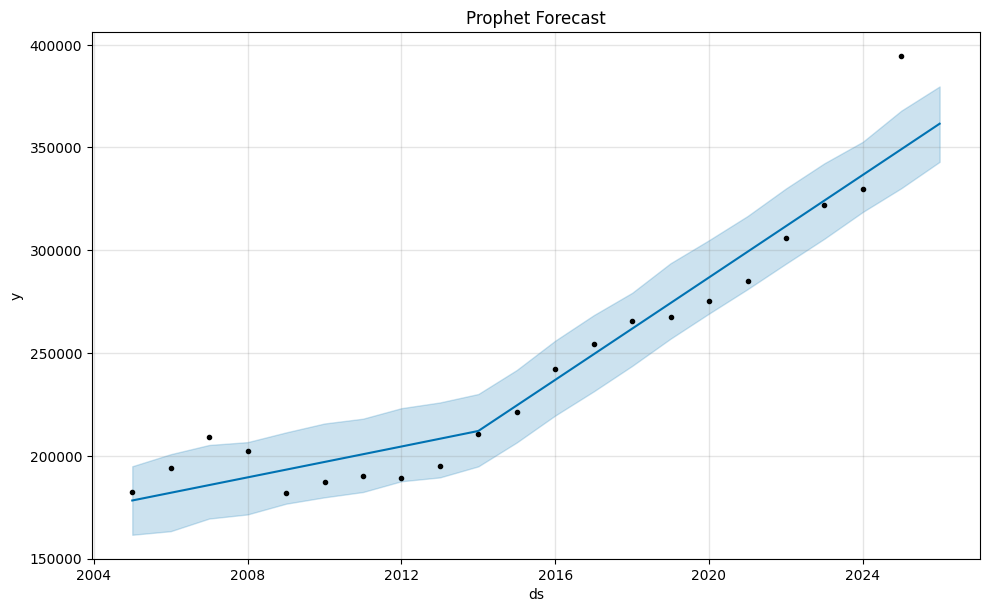

In [52]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
prophet_data = pd.DataFrame({
    'ds': pd.to_datetime(new_build_price['Year'], format='%Y'),
    'y': new_build_price['New_Build_AvgPrice_UK_Yearly']
})

# Fit model
model = Prophet(yearly_seasonality=False, daily_seasonality=False)
model.fit(prophet_data)

# Forecast 2026
future = model.make_future_dataframe(periods=1, freq='YE')  # Changed to 'YE'
forecast = model.predict(future)

# Get 2026 forecast (last row)
forecast_2026 = forecast['yhat'].iloc[-1]
lower_bound = forecast['yhat_lower'].iloc[-1]
upper_bound = forecast['yhat_upper'].iloc[-1]

print(f"Prophet 2026 Forecast: £{forecast_2026:,.2f}")
print(f"95% CI: £{lower_bound:,.2f} - £{upper_bound:,.2f}")

# Show last few predictions
print("\nLast 3 predictions:")
print(forecast[['ds', 'yhat']].tail(3))

# Plot
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

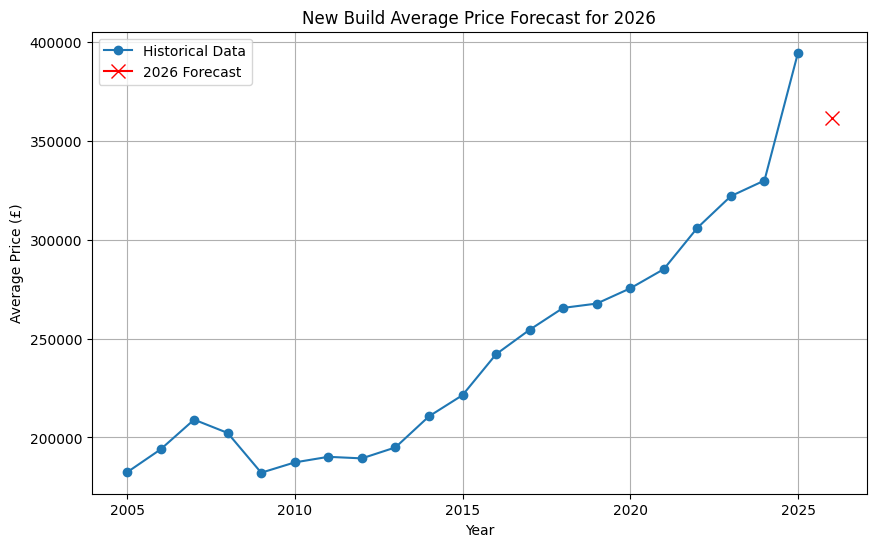

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o', label='Historical Data')
plt.plot(2026, forecast_2026, marker='x', color='red', markersize=10, label='2026 Forecast')  # Fixed: no .iloc[0]
plt.title("New Build Average Price Forecast for 2026")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='730 days',  # ~2 years training start
                         period='180 days', horizon='365 days')  # Adjustdata length
df_perf = performance_metrics(df_cv)
print(df_perf.head())  # RMSE, MAD, MAPE; lower is better (MAPE<10% good for prices)


  0%|          | 0/35 [00:00<?, ?it/s]

15:08:12 - cmdstanpy - INFO - Chain [1] start processing
15:08:13 - cmdstanpy - INFO - Chain [1] done processing
15:08:13 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing
15:08:14 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing
15:08:14 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing
15:08:14 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing
15:08:14 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing
15:08:15 - cmdstanpy - INFO - Chain [1] start processing
15:08:15 - cmdstanpy - INFO - Chain [1] done processing
15:08:15 - cmdstanpy - INFO - Chain [1] start processing
15:08:15 - cmdstanpy - INFO - Chain [1] done processing
15:08:15 - cmdstanpy - INFO - Chain [1] start processing
15:08:15 - cmdstanpy - INFO - Chain [1]

   horizon           mse          rmse           mae      mape     mdape  \
0 106 days  5.577391e+08  23616.500163  21392.359100  0.113025  0.107750   
1 111 days  3.997305e+08  19993.260481  14447.632807  0.078789  0.047730   
2 116 days  2.713627e+07   5209.248222   3539.554555  0.018852  0.005043   
3 122 days  1.164167e+07   3411.988754   2487.652530  0.012838  0.005043   
4 127 days  1.389623e+08  11788.225660   8690.416379  0.042120  0.029687   

      smape  coverage  
0  0.105672  0.333333  
1  0.073268  0.666667  
2  0.018475  1.000000  
3  0.012980  1.000000  
4  0.043775  0.666667  


Prophet model forecasted value £361,557.64
2026 Auto-ARIMA Forecast £459,147.58

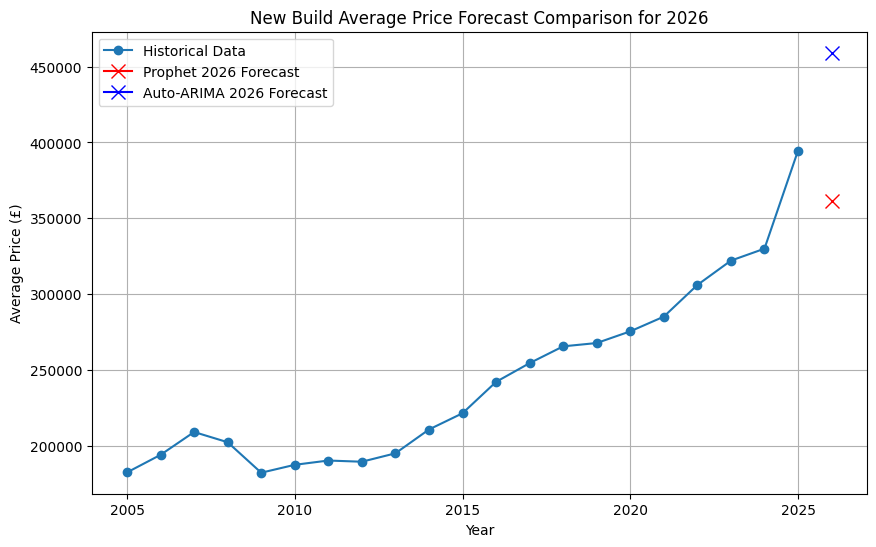

In [62]:
# Prophet model forecasted value £361,557.64
# 2026 Auto-ARIMA Forecast £459,147.58
#plot both forecasts for comparison with historical data
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o', label='Historical Data')
plt.plot(2026, forecast_2026, marker='x', color='red', markersize=10, label='Prophet 2026 Forecast')
plt.plot(2026, forecast_auto, marker='x', color='blue', markersize=10, label='Auto-ARIMA 2026 Forecast')
plt.title("New Build Average Price Forecast Comparison for 2026")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)
plt.show()

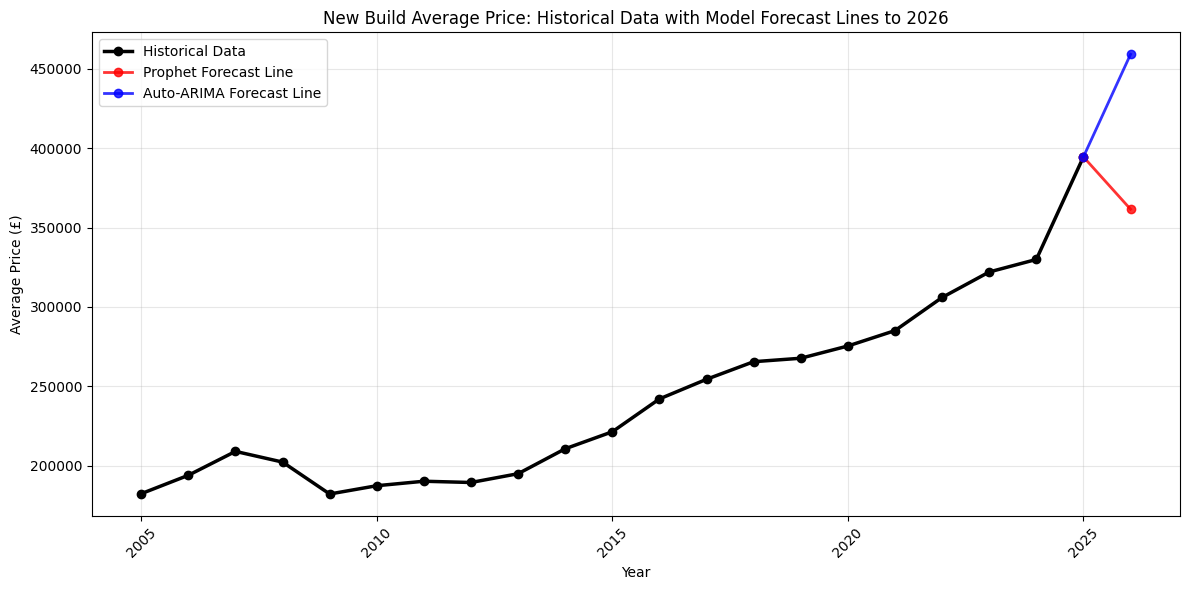

In [70]:
plt.figure(figsize=(12, 6))

# Historical data
years_hist = new_build_price["Year"].values
prices_hist = new_build_price["New_Build_AvgPrice_UK_Yearly"].values
plt.plot(
    years_hist,
    prices_hist,
    marker='o',
    markersize=6,           # size for all points
    linewidth=2.5,
    label='Historical Data',
    color='black'
)

last_year = years_hist[-1]
last_price = prices_hist[-1]

# Prophet line + point (same size as historical)
plt.plot(
    [last_year, 2026],
    [last_price, 361557.64],
    marker='o',
    markersize=6,           # same size
    linewidth=2,
    color='red',
    alpha=0.8,
    label='Prophet Forecast Line'
)

# Auto-ARIMA line + point (same size as historical)
plt.plot(
    [last_year, 2026],
    [last_price, 459147.58],
    marker='o',
    markersize=6,           # same size
    linewidth=2,
    color='blue',
    alpha=0.8,
    label='Auto-ARIMA Forecast Line'
)

plt.title("New Build Average Price: Historical Data with Model Forecast Lines to 2026")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


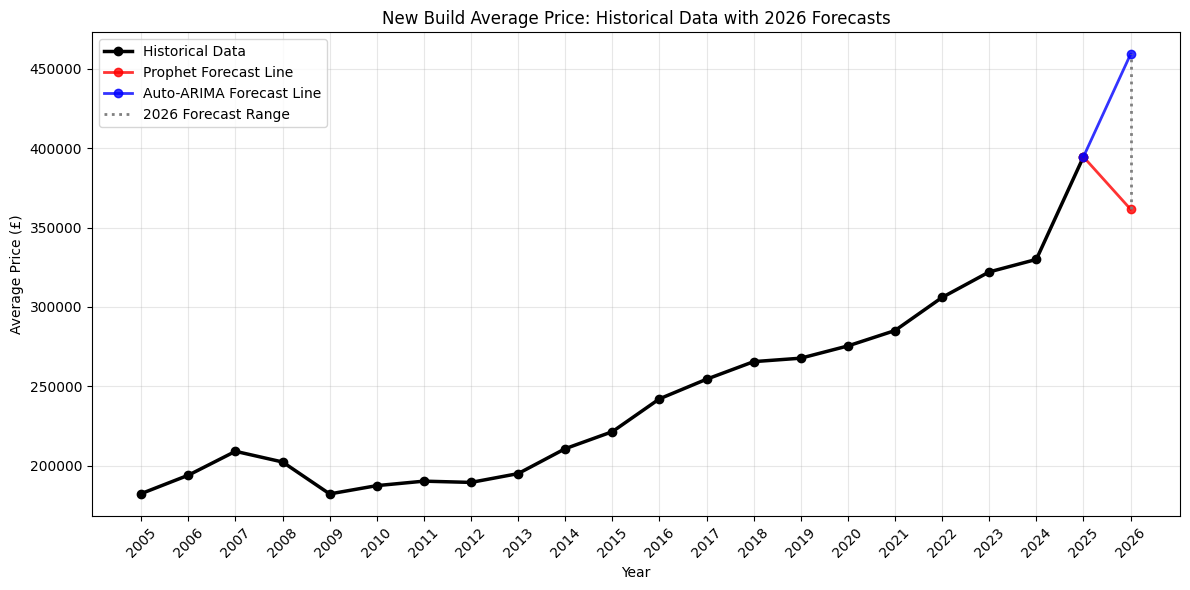

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Historical data
years_hist = new_build_price["Year"].values
prices_hist = new_build_price["New_Build_AvgPrice_UK_Yearly"].values
plt.plot(
    years_hist,
    prices_hist,
    marker='o',
    markersize=6,
    linewidth=2.5,
    label='Historical Data',
    color='black'
)

last_year = years_hist[-1]
last_price = prices_hist[-1]

# Forecast values
prophet_2026 = 361557.64
arima_2026   = 459147.58
year_2026    = 2026

# Lines from last historical point to each forecast
plt.plot(
    [last_year, year_2026],
    [last_price, prophet_2026],
    marker='o',
    markersize=6,
    linewidth=2,
    color='red',
    alpha=0.8,
    label='Prophet Forecast Line'
)
plt.plot(
    [last_year, year_2026],
    [last_price, arima_2026],
    marker='o',
    markersize=6,
    linewidth=2,
    color='blue',
    alpha=0.8,
    label='Auto-ARIMA Forecast Line'
)

# Vertical dotted line on x = 2026 connecting Prophet and ARIMA points
plt.vlines(
    x=year_2026,
    ymin=min(prophet_2026, arima_2026),
    ymax=max(prophet_2026, arima_2026),
    colors='gray',
    linestyles='dotted',
    linewidth=2,
    label='2026 Forecast Range'
)

# Ensure 2026 is on x-axis ticks
all_years_for_ticks = list(years_hist) + [year_2026]
plt.xticks(all_years_for_ticks, rotation=45)

plt.title("New Build Average Price: Historical Data with 2026 Forecasts")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
